### <center>Niharika Sharma</center>  <center>njsharma@uw.edu</center>
## <center> Assignment 1 -  Data curation </center>
# English Wikipedia page views, 2008 - 2017
### Author - Niharika Sharma

### Major tasks for the assignment
Step 1: Data acquisition  
Step 2: Data processing  
Step 3: Analysis  
Step 4: Documentation

### References
1. [Legacy Pagecounts API] (https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts)  
2. [pageview API] (https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews)   
3. [HCDE (Fall 2017) A1 Data curation] (https://wiki.communitydata.cc/HCDS_(Fall_2017)/Assignments#A1:_Data_curation)  

In [1]:
# import all the libraries - Set up 
import requests
import json
import pandas as pd
import os, errno
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Step 1: Data acquisition
### Call the legacy Pagecounts API (documentation, endpoint) that provides access to desktop traffic data from January 2008 through July 2016 and save the raw results into a JSON source data files.

In [2]:
# January 2008 through July 2016
# Pagecounts API
# Pagecounts API - desktop (pagecounts_desktop-site_200801-201607)

endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/niharikasharma', 'From' : 'njsharma@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016080100'
         }

api_call = requests.get(endpoint.format(**params))
response_pagecounts_desktop_site_200801_201607 = api_call.json()
# print(response_pagecounts_desktop_site_200801_201607)

# create a data repository if doesn't exist
try:
    os.makedirs('data')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
with open('data/pagecounts_desktop_site_200801_201607.json', 'w') as outfile:
    json.dump(response_pagecounts_desktop_site_200801_201607, outfile)


### Call the legacy Pagecounts API (documentation, endpoint) that provides access to mobile traffic data from January 2008 through July 2016 and save the raw results into a JSON source data files.

In [3]:
# Pagecounts API - mobile (pagecounts_mobile-site_200801-201607)

endpoint = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/niharikasharma', 'From' : 'njsharma@uw.edu'}

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-site',
            'granularity' : 'monthly',
            'start' : '2008010100',
            'end' : '2016080100'
         }

api_call = requests.get(endpoint.format(**params))
response_pagecounts_mobile_site_200801_201607 = api_call.json()
# print(response_pagecounts_mobile_site_200801_201607)

with open('data/pagecounts_mobile_site_200801_201607.json', 'w') as outfile:
    json.dump(response_pagecounts_mobile_site_200801_201607, outfile)


### Call the Pageviews API (documentation, endpoint) that provides access to mobile web traffic data from July 2015 through September 2017 and save the raw results into a JSON source data files.

In [4]:
# July 2015 through September 2017
# Pageviews API

endpoint = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers={'User-Agent' : 'https://github.com/niharikasharma', 'From' : 'njsharma@uw.edu'}

# Pageviews API - mobile web - (pageviews_mobile-web_201507-201709)

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-web',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'
         }

api_call = requests.get(endpoint.format(**params))
response_pageviews_mobile_web_201507_201709 = api_call.json()
# print(response_pageviews_mobile_web_201507_201709)

with open('data/pageviews_mobile_web_201507_201709.json', 'w') as outfile:
    json.dump(response_pageviews_mobile_web_201507_201709, outfile)


### Call the Pageviews API (documentation, endpoint) that provides access to mobile app traffic data from July 2015 through September 2017 and save the raw results into a JSON source data files.

In [5]:
# Pageviews API - mobile app - (pageviews_mobile-app_201507-201709)

params = {'project' : 'en.wikipedia.org',
            'access' : 'mobile-app',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'
         }

api_call = requests.get(endpoint.format(**params))
response_pageviews_mobile_app_201507_201709 = api_call.json()
# print(response_pageviews_mobile_app_201507_201709)

with open('data/pageviews_mobile_app_201507_201709.json', 'w') as outfile:
    json.dump(response_pageviews_mobile_app_201507_201709, outfile)


### Call the Pageviews API (documentation, endpoint) that provides access to desktop traffic data from July 2015 through September 2017 and save the raw results into a JSON source data files.

In [6]:
# Pageviews API - desktop - (pageviews_desktop_201507-201709)

params = {'project' : 'en.wikipedia.org',
            'access' : 'desktop',
            'agent' : 'user',
            'granularity' : 'monthly',
            'start' : '2015070100',
            'end' : '2017100100'
         }

api_call = requests.get(endpoint.format(**params))
response_pageviews_desktop_201507_201709 = api_call.json()
# print(response_pageviews_desktop_201507_201709)

with open('data/pageviews_desktop_201507_201709.json', 'w') as outfile:
    json.dump(response_pageviews_desktop_201507_201709, outfile)


# Step 2: Data processing
### Separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and extract the pageview_desktop_views, pageview_mobile_app_views and pageview_mobile_web_views field. Save all the list in a dataframe and merge the dataframes to get pageview data and pageview_mobile_views, and pageview_all_views fields by summing respective fields.

In [7]:
year = []
month = []
pageview_desktop_views = []

with open('data/pageviews_desktop_201507_201709.json') as data_file:    
    data = json.load(data_file)

for d in data['items']:
    year.append(str(d['timestamp'])[:4])
    month.append(str(d['timestamp'])[4:6])
    pageview_desktop_views.append(d['views'])

df_pageviews_desktop_201507_201709 = pd.DataFrame(
    {'year': year,
     'month': month,
     'pageview_desktop_views': pageview_desktop_views
    })

# print(df_pageviews_desktop_201507_201709)

year = []
month = []
pageview_mobile_app_views = []

with open('data/pageviews_mobile_app_201507_201709.json') as data_file:    
    data = json.load(data_file)

for d in data['items']:
    year.append(str(d['timestamp'])[:4])
    month.append(str(d['timestamp'])[4:6])
    pageview_mobile_app_views.append(d['views'])

df_pageviews_mobile_app_201507_201709 = pd.DataFrame(
    {'year': year,
     'month': month,
     'pageview_mobile_app_views': pageview_mobile_app_views
    })

# print(df_pageviews_mobile_app_201507_201709)


year = []
month = []
pageview_mobile_web_views = []

with open('data/pageviews_mobile_web_201507_201709.json') as data_file:    
    data = json.load(data_file)

for d in data['items']:
    year.append(str(d['timestamp'])[:4])
    month.append(str(d['timestamp'])[4:6])
    pageview_mobile_web_views.append(d['views'])

df_pageviews_mobile_web_201507_201709 = pd.DataFrame(
    {'year': year,
     'month': month,
     'pageview_mobile_web_views': pageview_mobile_web_views
    })

# print(df_pageviews_mobile_web_201507_201709)

# merge mobile web and app dataframes on month-year keys
df_pageviews_mobile_201507_201709 = pd.merge(df_pageviews_mobile_web_201507_201709, 
                                             df_pageviews_mobile_app_201507_201709, 
                                             on=['year', 'month'])

# calculate the sum of mobile web and app views 
df_pageviews_mobile_201507_201709['pageview_mobile_views'] = df_pageviews_mobile_201507_201709['pageview_mobile_app_views'] + df_pageviews_mobile_201507_201709['pageview_mobile_web_views']

# delete unwanted columns - pageview_mobile_web_views and pageview_mobile_app_views
df_pageviews_mobile_201507_201709 = df_pageviews_mobile_201507_201709.drop(['pageview_mobile_web_views', 'pageview_mobile_app_views'], axis=1)
# print(df_pageviews_mobile_201507_201709)

# merge mobile and desktop dataframes on month-year keys
df_pageviews_201507_201709 = pd.merge(df_pageviews_desktop_201507_201709,
                                      df_pageviews_mobile_201507_201709,
                                      on=['year', 'month'])

# calculate the sum of mobile and desktop views 
df_pageviews_201507_201709['pageview_all_views'] = df_pageviews_201507_201709['pageview_mobile_views'] + df_pageviews_201507_201709['pageview_desktop_views']

# print(df_pageviews_201507_201709)


### Repeat the same steps for processing pagecount data. Separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and extract the pagecount_desktop_views, and pagecount_mobile_views field. Save all the list in a dataframe and merge the dataframes to get pagecount data and pagecount_all_views field by summing respective fields.

In [8]:
# load json data from pagecount json files
year = []
month = []
pagecount_desktop_views = []

with open('data/pagecounts_desktop_site_200801_201607.json') as data_file:    
    data = json.load(data_file)

for d in data['items']:
    year.append(str(d['timestamp'])[:4])
    month.append(str(d['timestamp'])[4:6])
    pagecount_desktop_views.append(d['count'])

df_pagecounts_desktop_site_200801_201607 = pd.DataFrame(
    {'year': year,
     'month': month,
     'pagecount_desktop_views': pagecount_desktop_views
    })

# print(df_pagecounts_desktop_site_200801_201607)

year = []
month = []
pagecount_mobile_views = []

with open('data/pagecounts_mobile_site_200801_201607.json') as data_file:    
    data = json.load(data_file)

for d in data['items']:
    year.append(str(d['timestamp'])[:4])
    month.append(str(d['timestamp'])[4:6])
    pagecount_mobile_views.append(d['count'])

df_pagecounts_mobile_site_200801_201607 = pd.DataFrame(
    {'year': year,
     'month': month,
     'pagecount_mobile_views': pagecount_mobile_views
    })

# print(df_pagecounts_mobile_site_200801_201607)

df_pagecounts_200801_201607 = pd.merge(df_pagecounts_desktop_site_200801_201607,
                                      df_pagecounts_mobile_site_200801_201607,
                                      on=['year', 'month'], how='outer')
# fill nan with zeroes
df_pagecounts_200801_201607 = df_pagecounts_200801_201607.fillna(0)

# calculate the sum of mobile and desktop views 
df_pagecounts_200801_201607['pagecount_all_views'] = df_pagecounts_200801_201607['pagecount_mobile_views'] + df_pagecounts_200801_201607['pagecount_desktop_views']

# print(df_pagecounts_200801_201607)

### Merge pagecount and pageview dataset and for all months with 0 pageviews for a given access method (e.g. desktop-site, mobile-app), that value for that (column, month) is listed as 0.

In [9]:
# merge pagecount and pageview dataframes

df = pd.merge(df_pagecounts_200801_201607,
              df_pageviews_201507_201709,
              on=['year', 'month'], how='outer')

# fill nan with zeroes
df = df.fillna(0)

# print(df)

### Combine all data into a single CSV file

In [10]:
# save the final dataframe into csv
df.to_csv('data/en-wikipedia_traffic_200801-201709.csv', sep=',', encoding='utf-8', index=False, 
          columns=['year', 
                   'month', 
                   'pagecount_all_views',
                   'pagecount_desktop_views',
                   'pagecount_mobile_views',
                   'pageview_all_views',
                   'pageview_desktop_views',
                   'pageview_mobile_views'])


# Step 3: Analysis
### The visualization tracks three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop).
### The visualization is a replication of - (https://wiki.communitydata.cc/File:PlotPageviewsEN_overlap.png) which is one of the desired output from the assignment. 

//anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


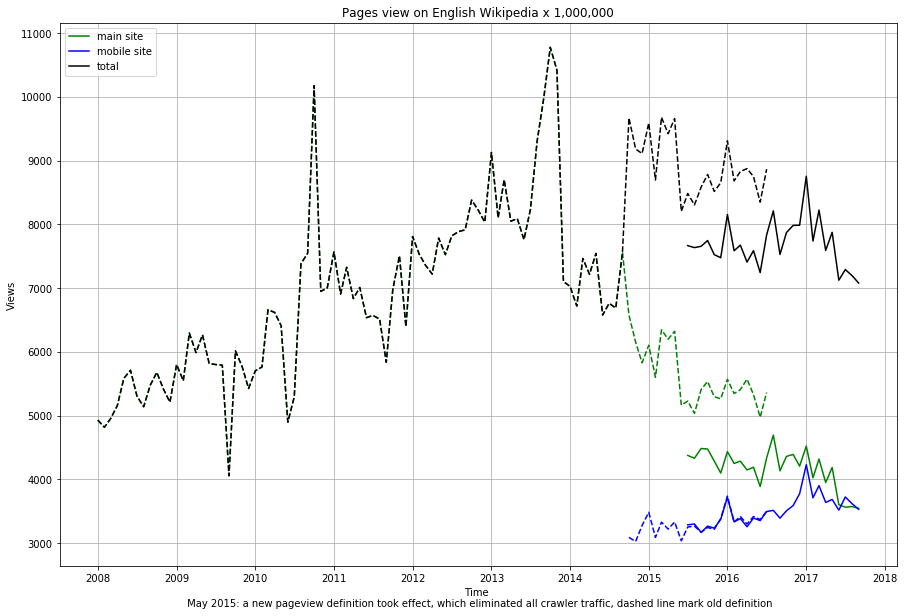

In [11]:
fig = plt.figure(figsize=(15,10))
plt.gca().set_color_cycle([ 'green', 'blue', 'black', 'green', 'blue', 'black'])

t = df.apply(lambda x:datetime.datetime.strptime("{0}/{1}".format(x['year'],x['month']), "%Y/%m"),axis=1)

s1 = np.array(df['pageview_desktop_views']/1000000)
s1[s1 == 0] = np.nan

s2 = np.array(df['pageview_mobile_views']/1000000)
s2[s2 == 0] = np.nan

s3 = np.array(df['pageview_all_views']/1000000)
s3[s3 == 0] = np.nan

s4 = np.array(df['pagecount_desktop_views']/1000000)
s4[s4 == 0] = np.nan

s5 = np.array(df['pagecount_mobile_views']/1000000)
s5[s5 == 0] = np.nan

s6 = np.array(df['pagecount_all_views']/1000000)
s6[s6 == 0] = np.nan

plt.plot(t, s1)
plt.plot(t, s2)
plt.plot(t, s3)
plt.plot(t, s4, '--')
plt.plot(t, s5, '--')
plt.plot(t, s6, '--')

plt.ylabel('Views')
plt.xlabel('Time \n May 2015: a new pageview definition took effect, which eliminated all crawler traffic, dashed line mark old definition')
plt.title('Pages view on English Wikipedia x 1,000,000')
plt.legend(['main site', 'mobile site', 'total'], loc='upper left')
plt.grid(True)
plt.show()


### Generate a .png or .jpeg formatted image of the final graph

In [12]:
fig.savefig('PlotPageviewsEN_overlap.png')